## Assignment 2.3 - Decision Tree
    Submitted by: 
    Amandeep Kaur (21044104)                                                                                   
    Bhupesh Dod (21046099)

## Import the Libraries

In [4]:
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree as plt_tree
from sklearn.tree import export_text as expt

## Import the Data

In [5]:
abalone_data = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/abalone.csv",
names= ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 
'Viscera_weight','Shell_weight', 'Rings'])


wine_data1 = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/winequality-red.csv",
 sep = ";")
wine_data1["colour"]=1
wine_data1 = wine_data1[list(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour', 'quality'))]

wine_data2 = pd.read_csv("/Users/amandeepkaur/Desktop/ECE657A/Assignments /Assignment 2/ece657a-W23-asg2-datasets-jupyterdemo/winequality-white.csv",
sep = ";")
wine_data2["colour"]=0
wine_data2 = wine_data2[list(('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour', 'quality'))]

wine_data = pd.concat([wine_data1, wine_data2])

wine_data = wine_data.reset_index()

X_abalone = abalone_data.iloc[:, 1:-1]
y_abalone = abalone_data.iloc[:, -1]

X_wine = wine_data.iloc[:, :-1]
y_wine = wine_data.iloc[:, -1]

sc = StandardScaler()

## Decision Tree

### Abalone Raw

In [6]:
X_a_train_raw, X_a_test_raw, y_a_train_raw, y_a_test_raw = train_test_split(X_abalone, y_abalone, random_state= 45)


sc = StandardScaler()
X_a_train_raw.iloc[:, :] = sc.fit_transform(X_a_train_raw.iloc[:, :])
X_a_test_raw.iloc[:, :] = sc.transform(X_a_test_raw.iloc[:, :])


# On Abalone Raw
dt = DT(random_state = 0)
X_a_train_raw = dt.fit(X_a_train_raw , y_a_train_raw)
y_a_pred_raw = dt.predict(X_a_test_raw)

print("Decision tree Accuracy for Abalone RAW with default params :%.2f" % (accuracy_score(y_a_pred_raw, y_a_test_raw)*100) + "%")

Decision tree Accuracy for Abalone RAW with default params :19.62%


### Abalone PCA

In [7]:
X_a_train_pca, X_a_test_pca, y_a_train_pca, y_a_test_pca = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_pca = sc.fit_transform(X_a_train_pca)
X_a_test_pca = sc.transform(X_a_test_pca)

pca = PCA(0.95)
X_a_train_pca = pca.fit_transform(X_a_train_pca)
X_a_test_pca = pca.transform(X_a_test_pca)


# On Abalone PCA
X_a_train_pca = dt.fit(X_a_train_pca, y_a_train_pca)
y_a_pred_pca = dt.predict(X_a_test_pca)
print("Decision tree Accuracy for Abalone PCA with default params :%.2f" % (accuracy_score(y_a_pred_pca, y_a_test_pca)*100) + "%")


Decision tree Accuracy for Abalone PCA with default params :18.47%


### Abalone LDA

In [8]:
X_a_train_lda, X_a_test_lda, y_a_train_lda, y_a_test_lda = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_lda = sc.fit_transform(X_a_train_lda)
X_a_test_lda = sc.transform(X_a_test_lda)

lda = LDA(n_components=4)
X_a_train_lda = lda.fit_transform(X_a_train_lda, y_a_train_lda)
X_a_test_lda = lda.transform(X_a_test_lda)

#On Abalone LDA

X_a_train_lda = dt.fit(X_a_train_lda, y_a_train_lda)
y_a_pred_lda = dt.predict(X_a_test_lda)


print("Decision tree Accuracy for Abalone LDA with default params :%.2f" % (accuracy_score(y_a_pred_lda, y_a_test_lda)*100) + "%")

Decision tree Accuracy for Abalone LDA with default params :19.14%


## Using GridSearchCV

### Abalone Raw

In [9]:
X_a_train_raw, X_a_test_raw, y_a_train_raw, y_a_test_raw = train_test_split(X_abalone, y_abalone, random_state= 100)


X_a_train_raw.iloc[:, :] = sc.fit_transform(X_a_train_raw.iloc[:, :])
X_a_test_raw.iloc[:, :] = sc.transform(X_a_test_raw.iloc[:, :])


param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14]}

grid = GridSearchCV(DT(), param_grid, refit= True, verbose=0)
grid.fit(X_a_train_raw, y_a_train_raw)
print("Best Parameters for Abalone Raw Random forest are:" +str(grid.best_params_))

Best Parameters for Abalone Raw Random forest are:{'max_depth': 5}


Text(0, 0.5, 'Accuracy')

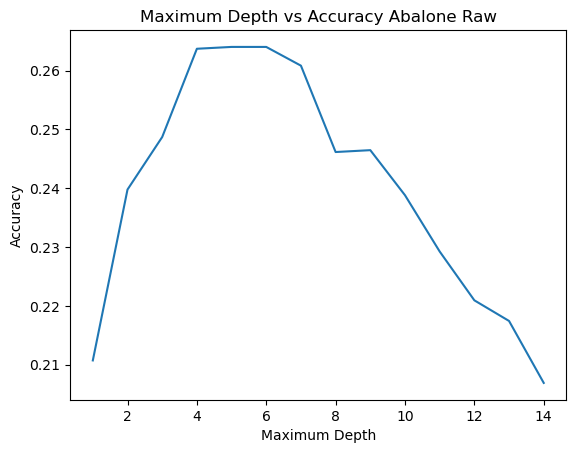

In [10]:
results = pd.DataFrame(grid.cv_results_)
fig, ax = plt.subplots()
r = range(1,15)
ax.plot(r,results['mean_test_score'])
plt.title("Maximum Depth vs Accuracy Abalone Raw")
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')

In [15]:
a_abalone_raw=results.loc[results['mean_test_score'] == max(results['mean_test_score'])]
a_abalone_raw

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.005154,0.000025,0.000613,0.000002,5,{'max_depth': 5},0.287081,0.282297,0.258786,0.239617,0.252396,0.264035,0.018022,1


In [16]:
X_a_train_raw, X_a_test_raw, y_a_train_raw, y_a_test_raw = train_test_split(X_abalone, y_abalone, random_state= 45)


dt = DT(max_depth=5)
X_a_train_raw = dt.fit(X_a_train_raw , y_a_train_raw)
y_a_pred_raw = dt.predict(X_a_test_raw)

print("Decision tree Accuracy for Abalone RAW with best params :%.2f" % (accuracy_score(y_a_pred_raw, y_a_test_raw)*100) + "%")
#fig = plt.figure(figsize=(25,20))
#plt_tree(dt, max_depth= 1, filled=True)

print(expt(dt, max_depth=3, feature_names=list(X_abalone.columns)))

Decision tree Accuracy for Abalone RAW with best params :24.69%
|--- Shell_weight <= 0.14
|   |--- Shell_weight <= 0.06
|   |   |--- Shell_weight <= 0.02
|   |   |   |--- Whole_weight <= 0.02
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Whole_weight >  0.02
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- Shell_weight >  0.02
|   |   |   |--- Viscera_weight <= 0.02
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Viscera_weight >  0.02
|   |   |   |   |--- truncated branch of depth 2
|   |--- Shell_weight >  0.06
|   |   |--- Shell_weight <= 0.11
|   |   |   |--- Shucked_weight <= 0.08
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Shucked_weight >  0.08
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- Shell_weight >  0.11
|   |   |   |--- Shucked_weight <= 0.23
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- Shucked_weight >  0.23
|   |   |   |   |--- truncated branch of depth 2
|--- S

### Abalone PCA

In [10]:
X_a_train_pca, X_a_test_pca, y_a_train_pca, y_a_test_pca = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_pca = sc.fit_transform(X_a_train_pca)
X_a_test_pca = sc.transform(X_a_test_pca)

pca = PCA(0.95)
X_a_train_pca = pca.fit_transform(X_a_train_pca)
X_a_test_pca = pca.transform(X_a_test_pca)

param_grid = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14]}

grid = GridSearchCV(DT(), param_grid, refit= True, verbose=0)
grid.fit(X_a_train_pca, y_a_train_pca)
print("Best Parameters for Abalone PCA Random forest are:" +str(grid.best_params_)) 

Best Parameters for Abalone PCA Random forest are:{'max_depth': 4}


Text(0, 0.5, 'Accuracy')

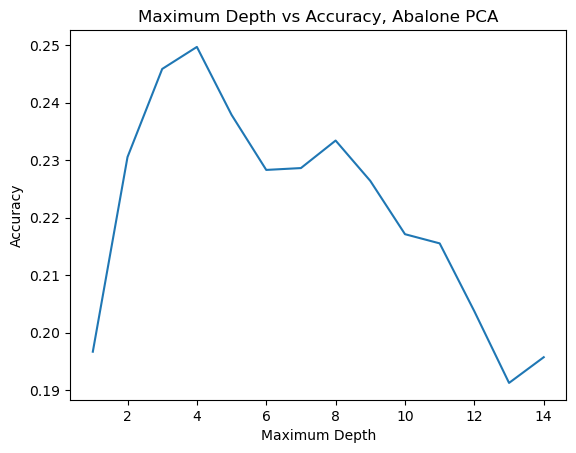

In [11]:
results = pd.DataFrame(grid.cv_results_)
fig, ax = plt.subplots()
r = range(1,15)
ax.plot(r,results['mean_test_score'])
plt.title("Maximum Depth vs Accuracy, Abalone PCA")
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')


In [12]:
results.loc[results['mean_test_score'] == max(results['mean_test_score'])]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.003554,0.000051,0.000234,0.000023,4,{'max_depth': 4},0.256778,0.242424,0.260383,0.234824,0.253994,0.249681,0.009559,1


In [35]:
X_a_train_pca, X_a_test_pca, y_a_train_pca, y_a_test_pca = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_pca = sc.fit_transform(X_a_train_pca)
X_a_test_pca = sc.transform(X_a_test_pca)

pca = PCA(0.95)
X_a_train_pca = pca.fit_transform(X_a_train_pca)
X_a_test_pca = pca.transform(X_a_test_pca)

dt = DT(max_depth=4)
X_a_train_pca = dt.fit(X_a_train_pca , y_a_train_pca)
y_a_pred_pca = dt.predict(X_a_test_pca)

print("Decision tree Accuracy for Abalone PCA with best params :%.2f" % (accuracy_score(y_a_pred_pca, y_a_test_pca)*100) + "%")

Decision tree Accuracy for Abalone PCA with best params :27.94%


### Abalone LDA

In [13]:
X_a_train_lda, X_a_test_lda, y_a_train_lda, y_a_test_lda = train_test_split(X_abalone, y_abalone, random_state= 45)


X_a_train_lda = sc.fit_transform(X_a_train_lda)
X_a_test_lda = sc.transform(X_a_test_lda)

lda = LDA(n_components=4)
X_a_train_lda = lda.fit_transform(X_a_train_lda, y_a_train_lda)
X_a_test_lda = lda.transform(X_a_test_lda)

param_grid = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14]}

grid = GridSearchCV(DT(), param_grid, refit= True, verbose=0)
grid.fit(X_a_train_lda, y_a_train_lda)
print("Best Parameters for Abalone LDA Random forest are:" +str(grid.best_params_))

Best Parameters for Abalone LDA Random forest are:{'max_depth': 4}


Text(0, 0.5, 'Accuracy')

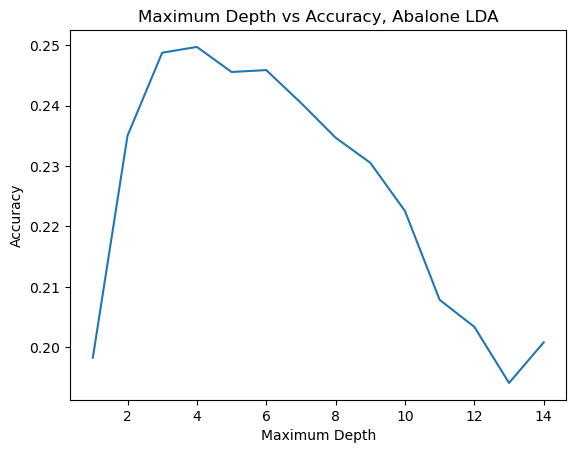

In [14]:
results = pd.DataFrame(grid.cv_results_)
fig, ax = plt.subplots()
r = range(1,15)
ax.plot(r,results['mean_test_score'])
plt.title("Maximum Depth vs Accuracy, Abalone LDA")
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')


In [15]:
results.loc[results['mean_test_score'] == max(results['mean_test_score'])]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.004525,0.00005,0.000228,0.000005,4,{'max_depth': 4},0.220096,0.247209,0.253994,0.271565,0.255591,0.249691,0.016816,1


In [31]:
X_a_train_lda, X_a_test_lda, y_a_train_lda, y_a_test_lda = train_test_split(X_abalone, y_abalone, random_state= 45)
X_a_train_lda = sc.fit_transform(X_a_train_lda)
X_a_test_lda = sc.transform(X_a_test_lda)

lda = LDA(n_components=4)
X_a_train_lda = lda.fit_transform(X_a_train_lda, y_a_train_lda)
X_a_test_lda = lda.transform(X_a_test_lda)


dt = DT(max_depth=4)
X_a_train_lda = dt.fit(X_a_train_lda , y_a_train_lda)
y_a_pred_lda = dt.predict(X_a_test_lda)

print("Decision tree Accuracy for Abalone LDA with best params :%.2f" % (accuracy_score(y_a_pred_lda, y_a_test_lda)*100) + "%")


Decision tree Accuracy for Abalone LDA with best params :24.69%


## Wine Data

## Wine Raw

In [36]:
X_w_train_raw, X_w_test_raw, y_w_train_raw, y_w_test_raw = train_test_split(X_wine, y_wine, random_state= 45)

X_w_train_raw.iloc[:, :-1] = sc.fit_transform(X_w_train_raw.iloc[:, :-1])
X_w_test_raw.iloc[:, :-1] = sc.transform(X_w_test_raw.iloc[:, :-1])


# On Wine Raw
dt = DT(random_state = 0)
X_w_train_raw = dt.fit(X_w_train_raw , y_w_train_raw)
y_w_pred_raw = dt.predict(X_w_test_raw)
accuracy_score(y_w_pred_raw, y_w_test_raw)
print("Decision tree Accuracy for Wine RAW with default params :%.2f" % (accuracy_score(y_w_pred_raw, y_w_test_raw)*100) + "%")

Decision tree Accuracy for Wine RAW with default params :57.35%


## Wine PCA

In [37]:
X_w_train_pca, X_w_test_pca, y_w_train_pca, y_w_test_pca = train_test_split(X_wine, y_wine, random_state= 45)

X_w_train_pca.iloc[:, :-1] = sc.fit_transform(X_w_train_pca.iloc[:, :-1])
X_w_test_pca.iloc[:, :-1] = sc.transform(X_w_test_pca.iloc[:, :-1])

pca = PCA(0.95)
X_w_train_pca = pca.fit_transform(X_w_train_pca)
X_w_test_pca = pca.transform(X_w_test_pca)


# On Wine PCA
X_w_train_pca = dt.fit(X_w_train_pca, y_w_train_pca)
y_w_pred_pca = dt.predict(X_w_test_pca)
print("Decision tree Accuracy for Wine PCA with default params :%.2f" % (accuracy_score(y_w_pred_pca, y_w_test_pca)*100) + "%")

Decision tree Accuracy for Wine PCA with default params :59.02%


## Wine LDA

In [38]:
X_w_train_lda, X_w_test_lda, y_w_train_lda, y_w_test_lda = train_test_split(X_wine, y_wine, random_state= 45)

X_w_train_lda.iloc[:, :-1] = sc.fit_transform(X_w_train_lda.iloc[:, :-1])
X_w_test_lda.iloc[:, :-1] = sc.transform(X_w_test_lda.iloc[:, :-1])


lda = LDA(n_components=4)
X_w_train_lda = lda.fit_transform(X_w_train_lda, y_w_train_lda)
X_w_test_lda = lda.transform(X_w_test_lda)

#On Wine LDA

X_w_train_lda = dt.fit(X_w_train_lda, y_w_train_lda)
y_w_pred_lda = dt.predict(X_w_test_lda)
print("Decision tree Accuracy for Wine LDA with default params :%.2f" % (accuracy_score(y_w_pred_lda, y_w_test_lda)*100) + "%")

Decision tree Accuracy for Wine LDA with default params :57.54%


## Using GridSearchCV

### Wine Raw

In [27]:
X_w_train_raw, X_w_test_raw, y_w_train_raw, y_w_test_raw = train_test_split(X_wine, y_wine, random_state= 100)


X_w_train_raw.iloc[:, :-1] = sc.fit_transform(X_w_train_raw.iloc[:, :-1])
X_w_test_raw.iloc[:, :-1] = sc.transform(X_w_test_raw.iloc[:, :-1])


param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14]}

grid = GridSearchCV(DT(), param_grid, refit= True, verbose=0)
grid.fit(X_w_train_raw, y_w_train_raw)
print("Best Parameters for Wine Raw Random forest are:" +str(grid.best_params_))
results = pd.DataFrame(grid.cv_results_)

Best Parameters for Wine Raw Random forest are:{'max_depth': 13}


Text(0, 0.5, 'Accuracy')

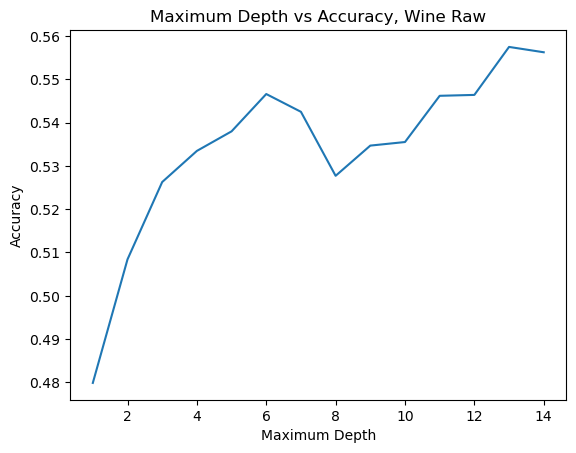

In [39]:
fig, ax = plt.subplots()
r = range(1,15)
ax.plot(r,results['mean_test_score'])
plt.title("Maximum Depth vs Accuracy, Wine Raw")
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')


In [40]:
results.loc[results['mean_test_score'] == max(results['mean_test_score'])]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.024053,0.000132,0.000738,0.000005,13,{'max_depth': 13},0.564103,0.564103,0.537988,0.575975,0.545175,0.557469,0.013865,1


In [41]:
X_w_train_raw, X_w_test_raw, y_w_train_raw, y_w_test_raw = train_test_split(X_wine, y_wine, random_state= 45)


# On Wine Raw
dt = DT(max_depth=13,random_state = 0)
X_w_train_raw = dt.fit(X_w_train_raw , y_w_train_raw)
y_w_pred_raw = dt.predict(X_w_test_raw)
accuracy_score(y_w_pred_raw, y_w_test_raw)

print("Decision tree Accuracy for Wine Raw with best params :%.2f" % (accuracy_score(y_w_pred_raw, y_w_test_raw)*100) + "%")

#fig = plt.figure()
#plt_tree(dt, max_depth= 1, filled=True)

print(expt(dt, max_depth=3, feature_names= list(X_wine.columns)))

Decision tree Accuracy for Wine Raw with best params :58.40%
|--- alcohol <= 10.35
|   |--- volatile acidity <= 0.24
|   |   |--- alcohol <= 8.85
|   |   |   |--- fixed acidity <= 7.25
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- fixed acidity >  7.25
|   |   |   |   |--- truncated branch of depth 5
|   |   |--- alcohol >  8.85
|   |   |   |--- residual sugar <= 1.35
|   |   |   |   |--- truncated branch of depth 8
|   |   |   |--- residual sugar >  1.35
|   |   |   |   |--- truncated branch of depth 10
|   |--- volatile acidity >  0.24
|   |   |--- alcohol <= 9.85
|   |   |   |--- fixed acidity <= 10.85
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- fixed acidity >  10.85
|   |   |   |   |--- truncated branch of depth 4
|   |   |--- alcohol >  9.85
|   |   |   |--- volatile acidity <= 0.56
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- volatile acidity >  0.56
|   |   |   |   |--- truncated branch of depth 9
|--- alcohol >  

### Wine PCA

In [46]:
X_w_train_pca, X_w_test_pca, y_w_train_pca, y_w_test_pca = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_pca.iloc[:, :-1] = sc.fit_transform(X_w_train_pca.iloc[:, :-1])
X_w_test_pca.iloc[:, :-1] = sc.transform(X_w_test_pca.iloc[:, :-1])

pca = PCA(0.95)
X_w_train_pca = pca.fit_transform(X_w_train_pca)
X_w_test_pca = pca.transform(X_w_test_pca)

param_grid = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21]}

grid = GridSearchCV(DT(), param_grid, refit= True, verbose=0)
grid.fit(X_w_train_pca, y_w_train_pca)

print("Best Parameters for Wine PCA Random forest are:" +str(grid.best_params_))

Best Parameters for Wine PCA Random forest are:{'max_depth': 14}


Text(0, 0.5, 'Accuracy')

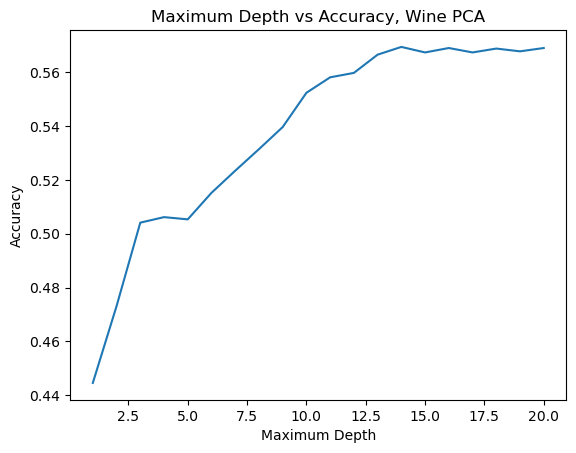

In [47]:
results = pd.DataFrame(grid.cv_results_)
fig, ax = plt.subplots()
r = range(1,21)
ax.plot(r,results['mean_test_score'])
plt.title("Maximum Depth vs Accuracy, Wine PCA")
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')


In [48]:
results.loc[results['mean_test_score'] == max(results['mean_test_score'])]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.034006,0.000388,0.000283,0.000001,14,{'max_depth': 14},0.6,0.568205,0.549281,0.554415,0.574949,0.56937,0.017877,1


In [79]:
X_w_train_pca, X_w_test_pca, y_w_train_pca, y_w_test_pca = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_pca.iloc[:, :-1] = sc.fit_transform(X_w_train_pca.iloc[:, :-1])
X_w_test_pca.iloc[:, :-1] = sc.transform(X_w_test_pca.iloc[:, :-1])

pca = PCA(0.95)
X_w_train_pca = pca.fit_transform(X_w_train_pca)
X_w_test_pca = pca.transform(X_w_test_pca)

dt = DT(max_depth=14)
X_w_train_pca = dt.fit(X_w_train_pca , y_w_train_pca)
y_w_pred_pca = dt.predict(X_w_test_pca)

print("Decision tree Accuracy for Wine PCA with best params :%.2f" % (accuracy_score(y_w_pred_pca, y_w_test_pca)*100) + "%")

Decision tree Accuracy for Wine PCA with best params :58.65%


### Wine LDA

In [83]:
X_w_train_lda, X_w_test_lda, y_w_train_lda, y_w_test_lda = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_lda.iloc[:, :-1] = sc.fit_transform(X_w_train_lda.iloc[:, :-1])
X_w_test_lda.iloc[:, :-1] = sc.transform(X_w_test_lda.iloc[:, :-1])

lda = LDA(n_components=4)
X_w_train_lda = lda.fit_transform(X_w_train_lda, y_w_train_lda)
X_w_test_lda = lda.transform(X_w_test_lda)


param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21]}

grid = GridSearchCV(DT(), param_grid, refit= True, verbose=0)
grid.fit(X_w_train_lda, y_w_train_lda)

print("Best Parameters for Wine LDA Random forest are:" +str(grid.best_params_))

Best Parameters for Wine LDA Random forest are:{'max_depth': 17}


Text(0, 0.5, 'Accuracy')

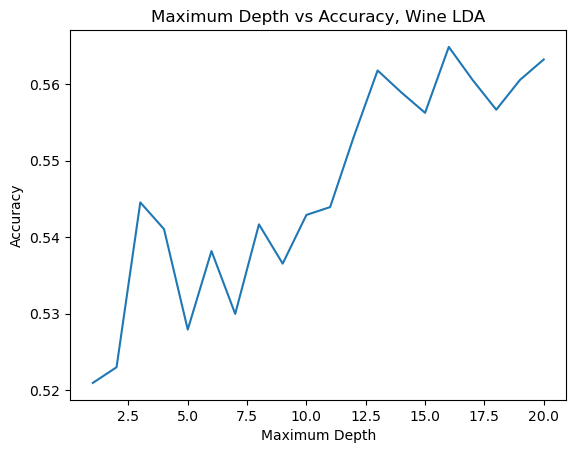

In [84]:
results = pd.DataFrame(grid.cv_results_)
fig, ax = plt.subplots()
r = range(1,21)
ax.plot(r,results['mean_test_score'])
plt.title("Maximum Depth vs Accuracy, Wine LDA")
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')


In [85]:
results.loc[results['mean_test_score'] == max(results['mean_test_score'])]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.016101,0.000173,0.000284,0.000002,17,{'max_depth': 17},0.561026,0.589744,0.572895,0.543121,0.557495,0.564856,0.015654,1


In [87]:
X_w_train_lda, X_w_test_lda, y_w_train_lda, y_w_test_lda = train_test_split(X_wine, y_wine, random_state= 45)


X_w_train_lda.iloc[:, :-1] = sc.fit_transform(X_w_train_lda.iloc[:, :-1])
X_w_test_lda.iloc[:, :-1] = sc.transform(X_w_test_lda.iloc[:, :-1])

pca = PCA(0.95)
X_w_train_lda = pca.fit_transform(X_w_train_lda)
X_w_test_lda = pca.transform(X_w_test_lda)

dt = DT(max_depth=17)
X_w_train_lda = dt.fit(X_w_train_lda , y_w_train_lda)
y_w_pred_lda = dt.predict(X_w_test_lda)

print("Decision tree Accuracy for Wine LDA with best params :%.2f" % (accuracy_score(y_w_pred_lda, y_w_test_lda)*100) + "%")

Decision tree Accuracy for Wine LDA with best params :59.38%
